In [50]:
#import my Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

study_results = "data/Study_results.csv"
mouse_data = "data/Mouse_metadata.csv"

trial_df = pd.read_csv(study_results)
mouse_drug_df = pd.read_csv(mouse_data)

In [51]:
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [52]:
mouse_drug_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [53]:
#new Dataframe merged on "Mouse ID"
mouse_df2 = pd.merge(trial_df, mouse_drug_df, on=('Mouse ID'))
mouse_df2.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [54]:
#create a varible to count the mice in the merged mouse_df2 df
count_of_mice = mouse_df2["Mouse ID"].count()
count_of_mice

1893

In [55]:
# This finds the duplicate mice by ID from the to columns
dup_rows = mouse_df2[mouse_df2.duplicated(['Mouse ID', 'Timepoint'])]
dup_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [56]:
#Clean DataFrame with no dups
clean_mouse = mouse_df2.drop_duplicates("Mouse ID")
clean_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [57]:
#creating a dataframe showing data points for each treatment
drug_regimen_df = pd.DataFrame(mouse_df2.groupby(["Drug Regimen"]).count()).reset_index()
drug_regimen_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,161,161,161,161,161,161,161
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


In [58]:
#mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#groupby drug regimen, tummor volume for each ask 

mean = mouse_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = mouse_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#summary in one dataframe
summary_stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
#aggregration method wow
mouse_df2.groupby("Drug Regimen").agg(["mean","median","std","var","sem"])

Timepoint                                          \
                   mean median        std         var       sem   
Drug Regimen                                                      
Capomulin     21.565217     20  14.384994  206.928043  0.948518   
Ceftamin      19.747191     20  14.283969  204.031772  1.070629   
Infubinol     18.174157     15  13.473473  181.534470  1.009879   
Ketapril      19.707447     20  14.029935  196.839089  1.023238   
Naftisol      19.623656     20  14.184814  201.208951  1.040081   
Placebo       18.674033     15  13.890798  192.954266  1.032495   
Propriva      16.863354     15  13.472424  181.506211  1.061776   
Ramicane      21.425439     20  14.275720  203.796178  0.945433   
Stelasyn      19.226519     20  13.842710  191.620626  1.028921   
Zoniferol     19.368132     15  14.384679  206.918979  1.066263   

             Tumor Volume (mm3)                                            \
                           mean     median       std        var       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346   
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821   
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236   
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860   
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466   
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331   
Propriva              52.322552  50.854632  6.507770  42.351070  0.512884   
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955   
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111   
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398   

              ... Age_months                                       Weight (g)  \
              ...       mean median       std        var       sem       mean   
Drug Regimen  ...                                                               
Capomulin     ...  13.456522   16.5  7.721423  59.620372  0.509136  19.965217   
Ceftamin      ...  13.247191   12.0  8.071406  65.147591  0.604977  27.398876   
Infubinol     ...  16.230337   20.0  7.510278  56.404272  0.562919  27.196629   
Ketapril      ...  15.659574   18.0  6.019670  36.236432  0.439030  27.861702   
Naftisol      ...  12.000000    9.0  6.715855  45.102703  0.492430  27.166667   
Placebo       ...  10.734807   10.0  6.354907  40.384837  0.472356  27.928177   
Propriva      ...  10.894410    8.0  7.304624  53.357531  0.575685  27.043478   
Ramicane      ...  10.684211    9.0  5.946629  35.362393  0.393825  19.679825   
Stelasyn      ...  12.784530   14.0  7.939562  63.036648  0.590143  27.856354   
Zoniferol     ...  12.598901   12.5  5.786114  33.479115  0.428895  27.692308   

                                                    
             median       std        var       sem  
Drug Regimen                                        
Capomulin      20.5  2.732404   7.466034  0.180169  
Ceftamin       28.0  1.581460   2.501016  0.118535  
Infubinol      27.0  2.183810   4.769028  0.163684  
Ketapril       28.0  1.841884   3.392536  0.134333  
Naftisol       27.0  1.499249   2.247748  0.109930  
Placebo        28.0  1.837973   3.378146  0.136615  
Propriva       26.0  1.670882   2.791848  0.131684  
Ramicane       19.0  3.235014  10.465318  0.214244  
Stelasyn       28.0  1.643616   2.701473  0.122169  
Zoniferol      28.0  1.419612   2.015300  0.105229  

[10 rows x 25 columns]

In [60]:
# changing the data frame to two columns to make it easir to plot
drugs_results_df = drug_regimen_df[["Drug Regimen", "Mouse ID"]]
drugs_results_df = drug_regimen_df.set_index("Drug Regimen")

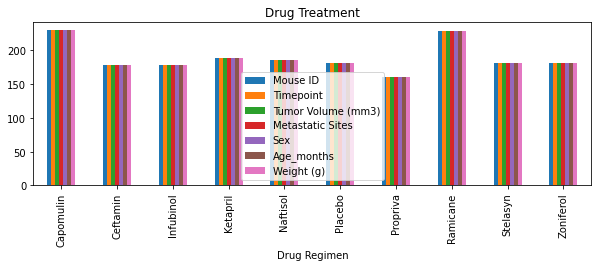

<Figure size 432x288 with 0 Axes>

In [61]:
#using matplotlib to plot
drugs_results_df.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment")
plt.show()
plt.tight_layout() 

<AxesSubplot:xlabel='Drug Regimen'>

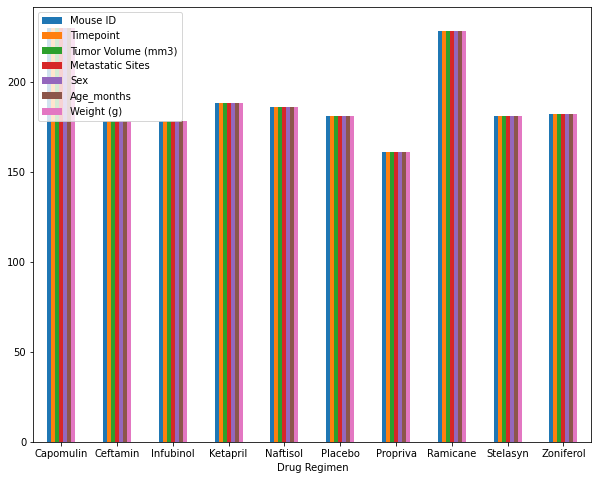

In [62]:
# using pandas to plot
#drug_regimen_df.plot.bar(drug_regimen_df["Drug Regimen"],drug_regimen_df["Mouse ID"])
#fig=plt.figure(figsize=(10,8))
drugs_results_df.plot.bar(rot=0,figsize=(10,8))


<AxesSubplot:ylabel='Mouse ID'>

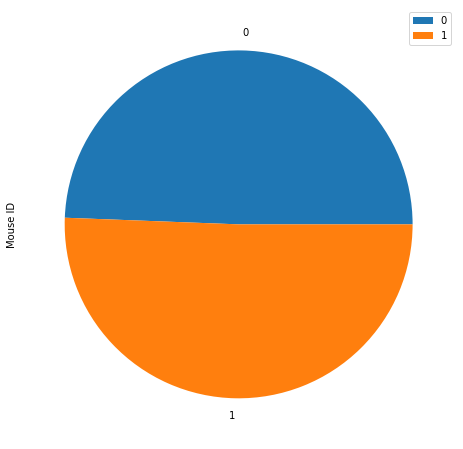

In [63]:
gender_df = pd.DataFrame(mouse_df2.groupby(["Sex"]).count()).reset_index()
gender_df.head()
#Distibuton male vs female using pandas to plot
gender_df.plot.pie(y="Mouse ID",figsize=(10,8))


Text(0, 0.5, '')

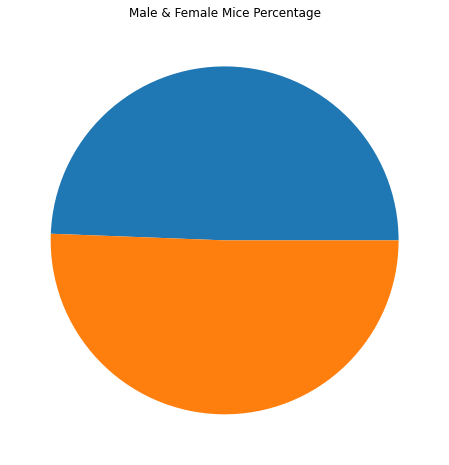

In [64]:
#Distributon male vs female Using matplotlib to plot
fig=plt.figure(figsize=(10,8))
plt.pie(gender_df["Mouse ID"])

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [65]:
#Extract the top 4 regimenes from the data frame in order to perform IQR test on each

top_regimes = mouse_df2[mouse_df2["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimes = top_regimes.sort_values(["Timepoint"], ascending=True)
top_regimes

top_regimes_data = top_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

top_regimes_data


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
1613,Ceftamin,x226,0,45.000000
1488,Ceftamin,x581,0,45.000000
1478,Ceftamin,a275,0,45.000000
1468,Ceftamin,k210,0,45.000000
...,...,...,...,...
1824,Capomulin,g316,45,40.159220
1477,Ceftamin,k210,45,68.923185
460,Ramicane,j913,45,31.560470
1497,Ceftamin,x581,45,64.634949


In [66]:
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
top_regimens_sort = top_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_regimens_sort.head()

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
Name: Tumor Volume (mm3), dtype: float64

In [67]:
#Turn retrieved data into dataframe to easily manipulate
top_regimen_df = top_regimens_sort.to_frame()
top_regimen_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

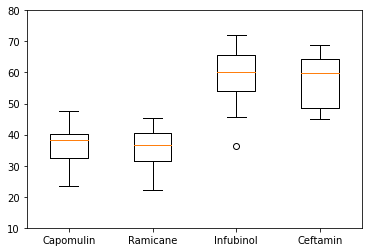

In [68]:
#treatment list to loop through and for plot labels

top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#box plot
final_df = top_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

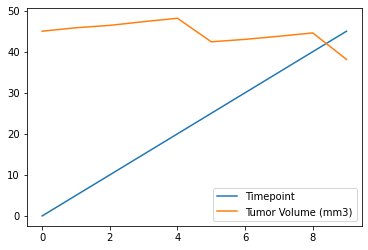

In [69]:
# This Generates a line plot of tumor volume vs. time point for a mouse treated with Capomulin

time_vs_tumer = mouse_df2[mouse_df2["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

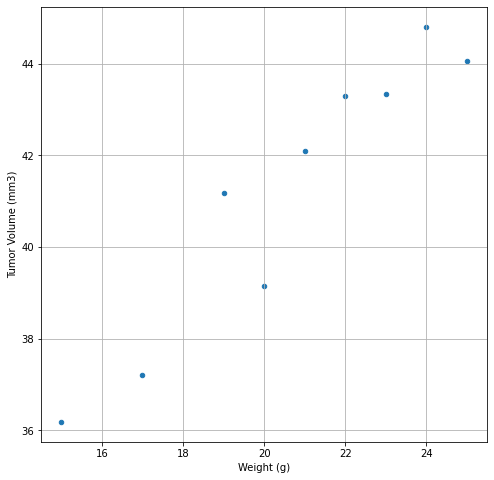

In [70]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_scatter = mouse_df2[mouse_df2["Drug Regimen"].isin(["Capomulin"])]

capo_scatter_df = top_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capo_scatter_plot = capo_scatter.reset_index()

capo_sorted = capo_scatter_plot.sort_values(["Weight (g)"], ascending=True)



capo_grouped_weight = capo_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capo_grouped_weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#
capo_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
capo_scatter

In [72]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()

NameError: name 'linregress' is not defined